In [ ]:
# Handle class imbalance by upsampling minority class
from sklearn.utils import resample

df_ham = df[df['label'] == 'ham']
df_spam = df[df['label'] == 'spam']

df_spam_upsampled = resample(df_spam,
                             replace=True,
                             n_samples=len(df_ham),
                             random_state=42)

df_balanced = pd.concat([df_ham, df_spam_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # shuffle

X = df_balanced['cleaned_message']
y = df_balanced['label']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Shape: (5572, 2)

Class Distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


/tmp/ipython-input-2070631923.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


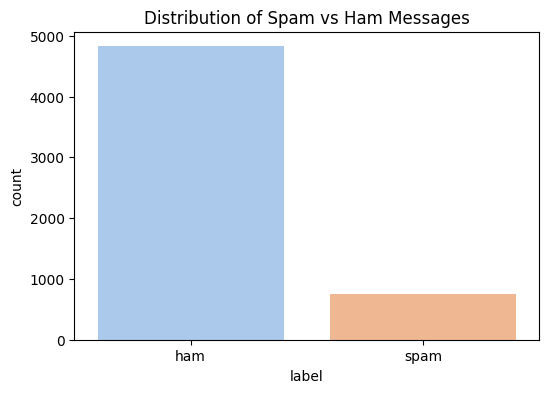


📊 Model: Naive Bayes
Accuracy: 0.9677033492822966
Precision: 1.0
Recall: 0.7589285714285714
F1-score: 0.8629441624365483

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.76      0.86       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672


📊 Model: Logistic Regression
Accuracy: 0.9635167464114832
Precision: 0.9766081871345029
Recall: 0.7455357142857143
F1-score: 0.8455696202531645

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.98      0.75      0.85       224

    accuracy                           0.96      1672
   macro avg       0.97      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672



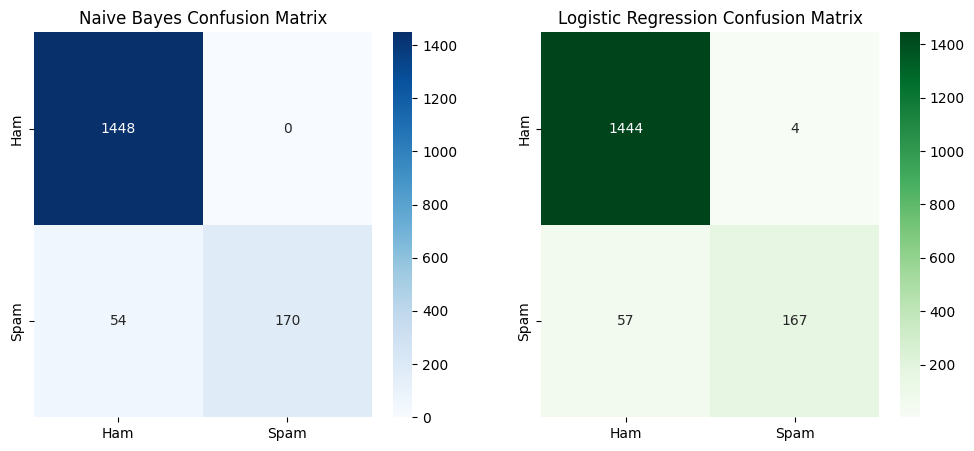

Message: Congratulations! You have won a free lottery ticket!
Predicted Class: ham
Message: Hey, can we meet tomorrow for lunch?
Predicted Class: ham

✅ Models and vectorizer saved successfully!


In [ ]:
# ==========================================
# 📦 SMS Spam Detection Project
# Author: Shivaya
# ==========================================

# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# ==========================================
# ✅ Step 2: Load Dataset
# ==========================================

# Dataset URL (UCI SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df.head()

# ==========================================
# ✅ Step 3: Inspect Data
# ==========================================
print("Dataset Shape:", df.shape)
print("\nClass Distribution:\n", df['label'].value_counts())

# Plot spam vs ham distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title("Distribution of Spam vs Ham Messages")
plt.show()

# ==========================================
# ✅ Step 4: Data Cleaning and Preprocessing
# ==========================================

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [ps.stem(word) for word in tokens]  # stemming
    return " ".join(tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)
df.head()

# ==========================================
# ✅ Step 5: Feature Extraction (BoW & TF-IDF)
# ==========================================

# Split data
X = df['cleaned_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bag of Words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# ==========================================
# ✅ Step 6: Train Models (Naive Bayes & Logistic Regression)
# ==========================================

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# ==========================================
# ✅ Step 7: Evaluation Metrics
# ==========================================

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label='spam'))
    print("Recall:", recall_score(y_true, y_pred, pos_label='spam'))
    print("F1-score:", f1_score(y_true, y_pred, pos_label='spam'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# ==========================================
# ✅ Step 8: Confusion Matrices
# ==========================================
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Naive Bayes Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# ==========================================
# ✅ Step 9: Reusable Pipeline Function
# ==========================================
def predict_message(message, model=nb_model, vectorizer=tfidf_vectorizer):
    msg = preprocess_text(message)
    vec = vectorizer.transform([msg])
    pred = model.predict(vec)[0]
    print(f"Message: {message}")
    print(f"Predicted Class: {pred}")

# Test on sample messages
predict_message("Congratulations! You have won a free lottery ticket!")
predict_message("Hey, can we meet tomorrow for lunch?")

# ==========================================
# ✅ Step 10: Save Models
# ==========================================
import joblib
joblib.dump(nb_model, "naive_bayes_sms_model.pkl")
joblib.dump(lr_model, "logistic_regression_sms_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print("\n✅ Models and vectorizer saved successfully!")


In [ ]:
# ==========================================
# 🔧 Step 11: Improve Spam Detection Accuracy
# ==========================================

from sklearn.utils import resample

# Separate majority and minority classes
df_ham = df[df['label'] == 'ham']
df_spam = df[df['label'] == 'spam']

# Upsample spam class to balance the dataset
df_spam_upsampled = resample(df_spam,
                             replace=True,
                             n_samples=len(df_ham),
                             random_state=42)

# Combine balanced data
df_balanced = pd.concat([df_ham, df_spam_upsampled]).sample(frac=1, random_state=42)

X = df_balanced['cleaned_message']
y = df_balanced['label']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF with n-grams (captures word pairs like "free ticket")
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=2,
    max_df=0.9,
    stop_words='english'
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Retrain Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Re-evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)

print("\n📊 After Balancing & TF-IDF Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='spam'))
print("Recall:", recall_score(y_test, y_pred_lr, pos_label='spam'))
print("F1-score:", f1_score(y_test, y_pred_lr, pos_label='spam'))



📊 After Balancing & TF-IDF Tuning:
Accuracy: 0.9875647668393782
Precision: 0.9846689895470383
Recall: 0.9901892081289418
F1-score: 0.9874213836477987


In [ ]:
def predict_message(message, model=lr_model, vectorizer=tfidf_vectorizer):
    msg = preprocess_text(message)
    vec = vectorizer.transform([msg])
    pred = model.predict(vec)[0]
    print(f"Message: {message}")
    print(f"Predicted Class: {pred}")


In [ ]:
predict_message("Congratulations! You have won a free lottery ticket!")
predict_message("Hey, can we meet tomorrow for lunch?")


Message: Congratulations! You have won a free lottery ticket!
Predicted Class: spam
Message: Hey, can we meet tomorrow for lunch?
Predicted Class: ham
